# Variables affecting Ratings of Disney+ Movies

### Valery Leslie Tanada and Kai-li Chang

In [110]:
# Coder: Valery
# Libraries to be used
import matplotlib.pyplot as plt
from numpy import percentile
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import ProbPlot

In [4]:
# Coder: Valery
# Reading in the data 
raw_data = pd.read_csv("titles.csv")
# Checking it has been read correctly
raw_data

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,tt0032455,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],NaN,tt0029583,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0032910,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['animation', 'drama', 'family']",['US'],NaN,tt0034492,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,"['family', 'action']","['GB', 'US']",NaN,tt0043067,6.9,8229.0,10.698,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,tm1071287,Killer Shark vs. Killer Whale,MOVIE,Scientists dive deep on the mysterious and unu...,2021,PG-13,44,['documentation'],['US'],NaN,tt14811958,6.4,17.0,1.061,4.0
1531,tm1091101,Far From Raven's Home,MOVIE,Our gang is off for an exotic vacation of a li...,2021,G,11,"['animation', 'comedy']",[],NaN,tt15489328,5.6,8.0,0.744,10.0
1532,tm1075680,World's Most Dangerous Shark?,MOVIE,"The Great White has a scary reputation, but Ex...",2021,PG-13,44,['documentation'],[],NaN,NaN,NaN,NaN,1.400,NaN
1533,tm1133820,The Magic Maker,MOVIE,Famed magician Adam Trent breaks the number on...,2021,PG,43,[],['US'],NaN,tt16433786,4.2,9.0,1.504,NaN


In [5]:
# Coder: Valery
# Subsetting the data by "MOVIE" and columns we need as per our analysis demands 
data = raw_data[raw_data["type"] == "MOVIE"]
data = data[["imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score", "release_year"]]

# Analysis: Number of Votes by IMDB & TMDB Score

Text(0.5, 0, 'IMDB Votes')

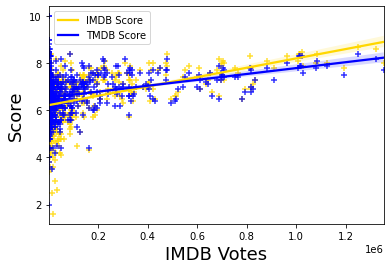

In [6]:
# Coder: Kelly

# Subsetting Values
I_vote = data.dropna(subset = ["imdb_score", "imdb_votes","tmdb_score"])

# Plotting and coloring appropriately
sns.regplot(y=I_vote.imdb_score, x = I_vote.imdb_votes, color = 'gold', marker = '+')
sns.regplot(y = I_vote.tmdb_score, x = I_vote.imdb_votes, color = 'blue', marker = '+')
plt.legend(labels=['IMDB Score', 'TMDB Score'])
plt.ylabel('Score', size=18)
plt.xlabel('IMDB Votes', size=18)

## Linear model of imdb_score against imdb_votes

In [10]:
# Coder: Kelly

# Creating a linear model: IMDB score against Number IMDB Votes
iscore_ivotes = sm.ols(formula = "imdb_score ~ imdb_votes", data = I_vote).fit()
print(iscore_ivotes.params)
print(iscore_ivotes.summary())

Intercept     6.224457
imdb_votes    0.000002
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     174.0
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           8.58e-36
Time:                        00:25:56   Log-Likelihood:                -962.26
No. Observations:                 731   AIC:                             1929.
Df Residuals:                     729   BIC:                             1938.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

### Creating diagnostic plots for the imdb scores against number of imdb votes

Text(0, 0.5, 'Standardized Residuals')

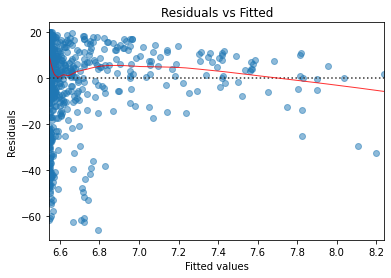

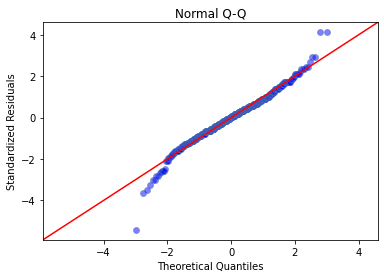

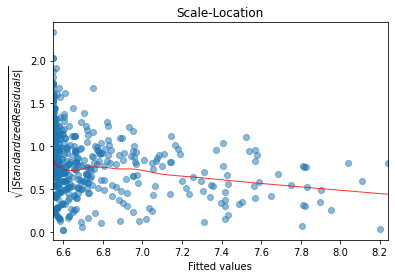

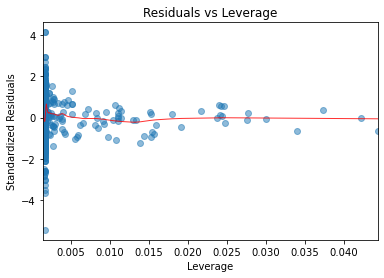

In [54]:
# Coder: Kelly

# Residuals vs Fitted Plot
residual_plot_m1 = plt.figure()
residual_plot_m1.axes[0] = sns.residplot(x = iscore_ivotes.fittedvalues, y = I_vote.columns[-1], data = I_vote, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
residual_plot_m1.axes[0].set_title('Residuals vs Fitted')
residual_plot_m1.axes[0].set_xlabel('Fitted values')
residual_plot_m1.axes[0].set_ylabel('Residuals')

# Normal Q-Q
QQ = ProbPlot(iscore_ivotes.get_influence().resid_studentized_internal)
qq_plot_m1 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
qq_plot_m1.axes[0].set_title('Normal Q-Q')
qq_plot_m1.axes[0].set_xlabel('Theoretical Quantiles')
qq_plot_m1.axes[0].set_ylabel('Standardized Residuals')

# Scale-Location
m1_norm_residuals = iscore_ivotes.get_influence().resid_studentized_internal
m1_norm_residuals_abs_sqrt = np.sqrt(np.abs(m1_norm_residuals))
SL_plot_m1 = plt.figure()
plt.scatter(x = iscore_ivotes.fittedvalues, y = m1_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(x = iscore_ivotes.fittedvalues, y = m1_norm_residuals_abs_sqrt, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, data = I_vote);
SL_plot_m1.axes[0].set_title('Scale-Location')
SL_plot_m1.axes[0].set_xlabel('Fitted values')
SL_plot_m1.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

# Residuals vs Leverage Plot
# leverage, from statsmodels internals
m1_leverage = iscore_ivotes.get_influence().hat_matrix_diag
# normalized residuals
m1_norm_residuals = iscore_ivotes.get_influence().resid_studentized_internal
RL_plot_m1 = plt.figure();
plt.scatter(x = m1_leverage, y = m1_norm_residuals, alpha=0.5);
sns.regplot(x = m1_leverage, y = m1_norm_residuals, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
RL_plot_m1.axes[0].set_title('Residuals vs Leverage')
RL_plot_m1.axes[0].set_xlabel('Leverage')
RL_plot_m1.axes[0].set_ylabel('Standardized Residuals')

## Linear model of tmdb_score against imdb_votes

In [40]:
# Coder: Kelly

# Creating a linear model: TMDB score against Number IMDB Votes
tscore_ivotes = sm.ols(formula = "tmdb_score ~ imdb_votes", data = I_vote).fit()
print(tscore_ivotes.params)
print(tscore_ivotes.summary())

Intercept     6.546659
imdb_votes    0.000001
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             tmdb_score   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     80.30
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           2.66e-18
Time:                        00:48:33   Log-Likelihood:                -907.47
No. Observations:                 731   AIC:                             1819.
Df Residuals:                     729   BIC:                             1828.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

### Creating diagnostic plots for the imdb scores against number of imdb votes

Text(0, 0.5, 'Standardized Residuals')

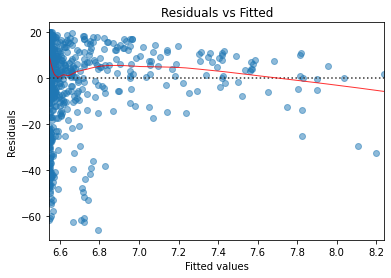

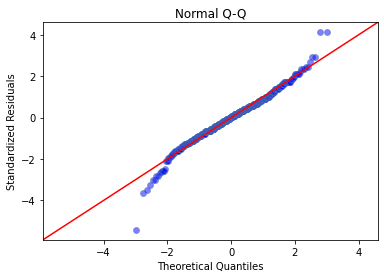

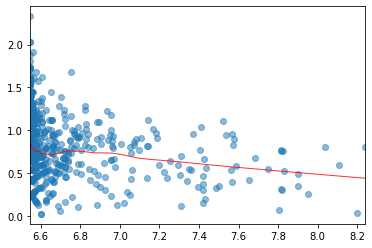

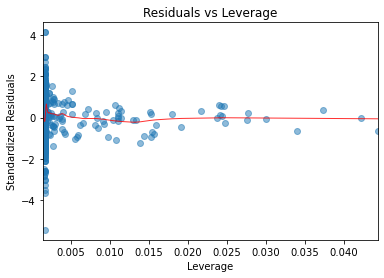

In [51]:
# Coder: Kelly

# Residuals vs Fitted Plot
residual_plot_m2 = plt.figure()
residual_plot_m2.axes[0] = sns.residplot(x = tscore_ivotes.fittedvalues, y = I_vote.columns[-1], data = I_vote, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
residual_plot_m2.axes[0].set_title('Residuals vs Fitted')
residual_plot_m2.axes[0].set_xlabel('Fitted values')
residual_plot_m2.axes[0].set_ylabel('Residuals')

# Normal Q-Q
QQ = ProbPlot(tscore_ivotes.get_influence().resid_studentized_internal)
qq_plot_m2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
qq_plot_m2.axes[0].set_title('Normal Q-Q')
qq_plot_m2.axes[0].set_xlabel('Theoretical Quantiles')
qq_plot_m2.axes[0].set_ylabel('Standardized Residuals')

# Scale-Location
m2_norm_residuals = tscore_ivotes.get_influence().resid_studentized_internal
m2_norm_residuals_abs_sqrt = np.sqrt(np.abs(m2_norm_residuals))
SL_plot_m2 = plt.figure()
plt.scatter(x = tscore_ivotes.fittedvalues, y = m2_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(x = tscore_ivotes.fittedvalues, y = m2_norm_residuals_abs_sqrt, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, data = I_vote);
SL_plot_m1.axes[0].set_title('Scale-Location')
SL_plot_m1.axes[0].set_xlabel('Fitted values')
SL_plot_m1.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

# Residuals vs Leverage Plot
# leverage, from statsmodels internals
m2_leverage = tscore_ivotes.get_influence().hat_matrix_diag
# normalized residuals
m2_norm_residuals = tscore_ivotes.get_influence().resid_studentized_internal
RL_plot_m2 = plt.figure();
plt.scatter(x = m2_leverage, y = m2_norm_residuals, alpha=0.5);
sns.regplot(x = m2_leverage, y = m2_norm_residuals, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
RL_plot_m2.axes[0].set_title('Residuals vs Leverage')
RL_plot_m2.axes[0].set_xlabel('Leverage')
RL_plot_m2.axes[0].set_ylabel('Standardized Residuals')

# Analysis: TMDB Popularity Score by IDMDB & TMDB Score

(5.7437499999999995, 12.247499999999999, 39.21549999999999)

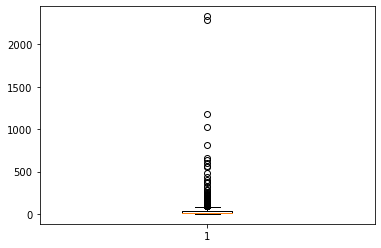

In [8]:
# Coder: Valery

# Finding quartiles for our data visualization for TMDB Popularity against TMDB and IMDB Scores
T_pop_full = data.dropna(subset = ["imdb_score", "tmdb_popularity","tmdb_score"])
plt.boxplot(T_pop_full[["tmdb_popularity"]])
q_25, q_50, q_75 = percentile(T_pop_full[["tmdb_popularity"]], [25, 50, 75])
(q_25, q_50, q_75)

## Model with All TMDB Popularity Data

Text(0.5, 0, 'TMDB Popularity')

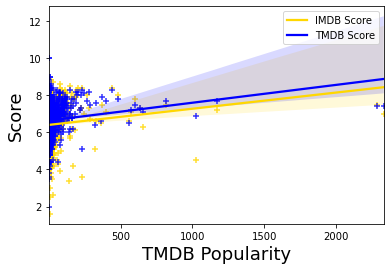

In [56]:
# Coder: Valery

# Showing the data in full with subsetting by TMDB Popularity Score
T_pop_full = data.dropna(subset = ["imdb_score", "tmdb_popularity","tmdb_score"])
# Plotting 
sns.regplot(y=T_pop_full.imdb_score, x = T_pop_full.tmdb_popularity, color = 'gold', marker = '+')
sns.regplot(y = T_pop_full.tmdb_score, x = T_pop_full.tmdb_popularity, color = 'blue', marker = '+')
plt.legend(labels=['IMDB Score', 'TMDB Score'])
plt.ylabel('Score', size=18)
plt.xlabel('TMDB Popularity', size=18)

In [57]:
# Coder: Kelly

# imdb_score ~ tmdb_popularity
iscore_tpop = sm.ols(formula = "imdb_score ~ tmdb_popularity", data = T_pop_full).fit()
print(iscore_tpop.params)
print(iscore_tpop.summary())

Intercept          6.401938
tmdb_popularity    0.000872
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     12.95
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           0.000342
Time:                        01:06:42   Log-Likelihood:                -1040.7
No. Observations:                 734   AIC:                             2085.
Df Residuals:                     732   BIC:                             2095.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [60]:
# Coder: Kelly
# tmdb_score ~ tmdb_popularity

tscore_tpop = sm.ols(formula = "tmdb_score ~ tmdb_popularity", data = T_pop_full).fit()
print(tscore_tpop.params)
print(tscore_tpop.summary())

Intercept          6.635876
tmdb_popularity    0.000962
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             tmdb_score   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     20.85
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           5.82e-06
Time:                        01:08:28   Log-Likelihood:                -937.88
No. Observations:                 734   AIC:                             1880.
Df Residuals:                     732   BIC:                             1889.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

## Model with Subset [min, Q3]

Text(0.5, 0, 'TMDB Popularity')

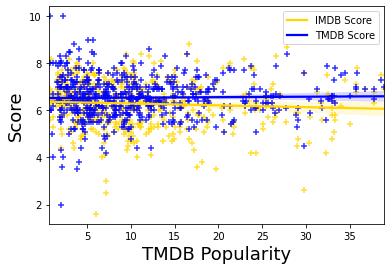

In [62]:
# Coder: Valery

# Showing the data in with subsetting by TMDB Popularity Score
# Subsetting within the minimum and 75th percentile
T_pop_1 = data.dropna(subset = ["imdb_score", "tmdb_popularity","tmdb_score"])
T_pop_1 = T_pop_full[T_pop_full["tmdb_popularity"] <= 39]
sns.regplot(y=T_pop_1.imdb_score, x = T_pop_1.tmdb_popularity, color = 'gold', marker = '+')
sns.regplot(y = T_pop_1.tmdb_score, x = T_pop_1.tmdb_popularity, color = 'blue', marker = '+')
plt.legend(labels=['IMDB Score', 'TMDB Score'])
plt.ylabel('Score', size=18)
plt.xlabel('TMDB Popularity', size=18)

In [70]:
# Coder: Kelly
# tmdb_score ~ tmdb_popularity

iscore_tpop = sm.ols(formula = "imdb_score ~ tmdb_popularity", data = T_pop_1).fit()
print(iscore_tpop.params)
print(iscore_tpop.summary())

Intercept          6.368413
tmdb_popularity   -0.007718
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.447
Date:                Sun, 12 Jun 2022   Prob (F-statistic):              0.118
Time:                        01:11:48   Log-Likelihood:                -763.40
No. Observations:                 549   AIC:                             1531.
Df Residuals:                     547   BIC:                             1539.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [63]:
# Coder: Kelly
# tmdb_score ~ tmdb_popularity

tscore_tpop = sm.ols(formula = "tmdb_score ~ tmdb_popularity", data = T_pop_1).fit()
print(tscore_tpop.params)
print(tscore_tpop.summary())

Intercept          6.521195
tmdb_popularity    0.001987
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             tmdb_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1894
Date:                Sun, 12 Jun 2022   Prob (F-statistic):              0.664
Time:                        01:09:34   Log-Likelihood:                -720.80
No. Observations:                 549   AIC:                             1446.
Df Residuals:                     547   BIC:                             1454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

## Model with Subset [Q3, 1.5*IQR + Q3]

Text(0.5, 0, 'TMDB Popularity')

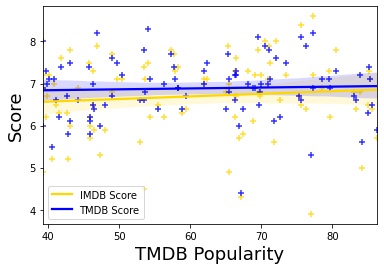

In [65]:
# Coder: Valery

# Showing the data in with subsetting by TMDB Popularity Score
# Subsetting within the 75th percentile and the 1.5*IQR + Q3 (our fifth point summary on the box plot)
cutoff = (39.204 - 5.734)*1.5 + 39.204
T_pop_2 = T_pop_full[(T_pop_full["tmdb_popularity"] > 39) & (T_pop_full["tmdb_popularity"] < cutoff)]
sns.regplot(y=T_pop_2.imdb_score, x = T_pop_2.tmdb_popularity, color = 'gold', marker = '+')
sns.regplot(y = T_pop_2.tmdb_score, x = T_pop_2.tmdb_popularity, color = 'blue', marker = '+')
plt.legend(labels=['IMDB Score', 'TMDB Score'])
plt.ylabel('Score', size=18)
plt.xlabel('TMDB Popularity', size=18)

In [71]:
# Coder: Kelly
# tmdb_score ~ tmdb_popularity

iscore_tpop = sm.ols(formula = "imdb_score ~ tmdb_popularity", data = T_pop_2).fit()
print(iscore_tpop.params)
print(iscore_tpop.summary())

Intercept          6.323983
tmdb_popularity    0.006166
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8871
Date:                Sun, 12 Jun 2022   Prob (F-statistic):              0.349
Time:                        01:12:13   Log-Likelihood:                -123.24
No. Observations:                  94   AIC:                             250.5
Df Residuals:                      92   BIC:                             255.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [66]:
# Coder: Kelly
# tmdb_score ~ tmdb_popularity

tscore_tpop = sm.ols(formula = "tmdb_score ~ tmdb_popularity", data = T_pop_2).fit()
print(tscore_tpop.params)
print(tscore_tpop.summary())

Intercept          6.756570
tmdb_popularity    0.002119
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             tmdb_score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1809
Date:                Sun, 12 Jun 2022   Prob (F-statistic):              0.672
Time:                        01:10:04   Log-Likelihood:                -97.580
No. Observations:                  94   AIC:                             199.2
Df Residuals:                      92   BIC:                             204.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

## Model with Subset [1.5*IQR + Q3, max]

Text(0.5, 0, 'TMDB Popularity')

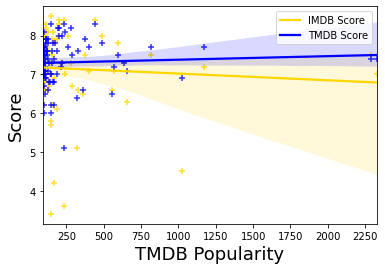

In [68]:
# Coder: Valery

# Showing the data in with subsetting by TMDB Popularity Score
# Subsetting by the Q3 + 1.5*IQR up to the maximum
T_pop_3 = data.dropna(subset = ["imdb_score", "tmdb_popularity","tmdb_score"])
T_pop_3 = T_pop_full[( T_pop_full["tmdb_popularity"] > cutoff)]
sns.regplot(y=T_pop_3.imdb_score, x = T_pop_3.tmdb_popularity, color = 'gold', marker = '+')
sns.regplot(y = T_pop_3.tmdb_score, x = T_pop_3.tmdb_popularity, color = 'blue', marker = '+')
plt.legend(labels=['IMDB Score', 'TMDB Score'])
plt.ylabel('Score', size=18)
plt.xlabel('TMDB Popularity', size=18)

In [72]:
# Coder: Kelly
# tmdb_score ~ tmdb_popularity

iscore_tpop = sm.ols(formula = "imdb_score ~ tmdb_popularity", data = T_pop_3).fit()
print(iscore_tpop.params)
print(iscore_tpop.summary())

Intercept          7.194372
tmdb_popularity   -0.000173
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.3973
Date:                Sun, 12 Jun 2022   Prob (F-statistic):              0.530
Time:                        01:12:23   Log-Likelihood:                -124.24
No. Observations:                  91   AIC:                             252.5
Df Residuals:                      89   BIC:                             257.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [69]:
# Coder: Kelly
# tmdb_score ~ tmdb_popularity

tscore_tpop = sm.ols(formula = "tmdb_score ~ tmdb_popularity", data = T_pop_3).fit()
print(tscore_tpop.params)
print(tscore_tpop.summary())

Intercept          7.287275
tmdb_popularity    0.000092
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             tmdb_score   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.2981
Date:                Sun, 12 Jun 2022   Prob (F-statistic):              0.586
Time:                        01:10:54   Log-Likelihood:                -79.187
No. Observations:                  91   AIC:                             162.4
Df Residuals:                      89   BIC:                             167.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

# Analysis: Release Year by IMDB & TMDB Score

Text(0.5, 0, 'Release Year')

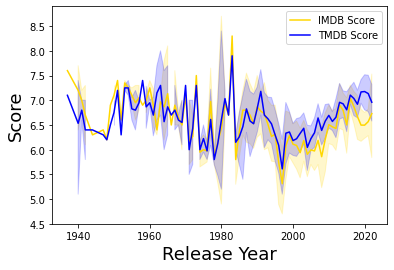

In [73]:
# Coder: Valery

# Subsetting appropriately to make the model
data_year = data.dropna(subset = ["imdb_score", "release_year","tmdb_score"])

# Visualizing the data
sns.lineplot(x = "release_year", y = "imdb_score", color = "gold", data = data_year)
sns.lineplot(x = "release_year", y = "tmdb_score", color = "blue", data = data_year)
plt.legend(labels=['IMDB Score', 'TMDB Score'])
plt.ylabel('Score', size=18)
plt.xlabel('Release Year', size=18)

## Creating linear models against release year

In [78]:
# Coder: Valery
# imdb_score ~ release_year
iscore_year = sm.ols(formula = "imdb_score ~ release_year", data = data_year).fit()
print(iscore_year.params)
print(iscore_year.summary())

Intercept       11.780140
release_year    -0.002664
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.725
Date:                Sun, 12 Jun 2022   Prob (F-statistic):              0.189
Time:                        01:16:56   Log-Likelihood:                -1046.2
No. Observations:                 734   AIC:                             2096.
Df Residuals:                     732   BIC:                             2106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Text(0, 0.5, 'Standardized Residuals')

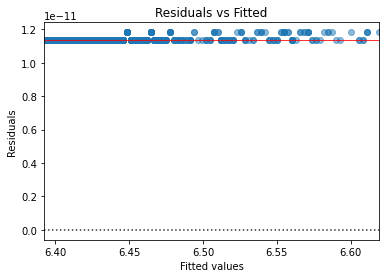

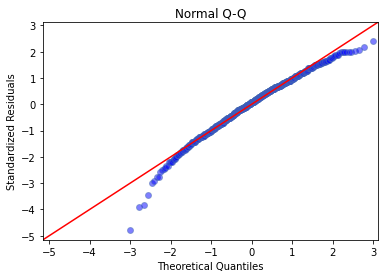

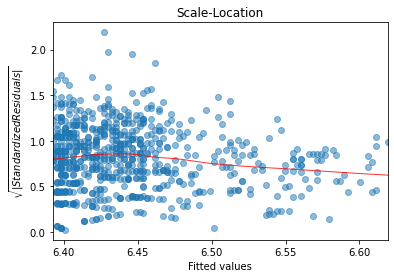

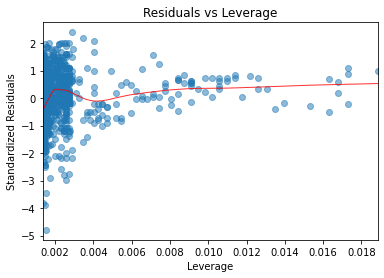

In [79]:
# Coder: Kelly

# Residuals vs Fitted Plot
residual_plot_m3 = plt.figure()
residual_plot_m3.axes[0] = sns.residplot(x = iscore_year.fittedvalues, y = data_year.columns[-1], data = data_year, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
residual_plot_m3.axes[0].set_title('Residuals vs Fitted')
residual_plot_m3.axes[0].set_xlabel('Fitted values')
residual_plot_m3.axes[0].set_ylabel('Residuals')

# Normal Q-Q
QQ = ProbPlot(iscore_year.get_influence().resid_studentized_internal)
qq_plot_m3 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
qq_plot_m3.axes[0].set_title('Normal Q-Q')
qq_plot_m3.axes[0].set_xlabel('Theoretical Quantiles')
qq_plot_m3.axes[0].set_ylabel('Standardized Residuals')

# Scale-Location
m3_norm_residuals = iscore_year.get_influence().resid_studentized_internal
m3_norm_residuals_abs_sqrt = np.sqrt(np.abs(m3_norm_residuals))
SL_plot_m3 = plt.figure()
plt.scatter(x = iscore_year.fittedvalues, y = m3_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(x = iscore_year.fittedvalues, y = m3_norm_residuals_abs_sqrt, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, data = I_vote);
SL_plot_m3.axes[0].set_title('Scale-Location')
SL_plot_m3.axes[0].set_xlabel('Fitted values')
SL_plot_m3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

# Residuals vs Leverage Plot
# leverage, from statsmodels internals
m3_leverage = iscore_year.get_influence().hat_matrix_diag
# normalized residuals
m3_norm_residuals = iscore_year.get_influence().resid_studentized_internal
RL_plot_m3 = plt.figure();
plt.scatter(x = m3_leverage, y = m3_norm_residuals, alpha=0.5);
sns.regplot(x = m3_leverage, y = m3_norm_residuals, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
RL_plot_m3.axes[0].set_title('Residuals vs Leverage')
RL_plot_m3.axes[0].set_xlabel('Leverage')
RL_plot_m3.axes[0].set_ylabel('Standardized Residuals')

In [76]:
# Coder: Valery
# tmdb_score ~ release_year
tscore_year = sm.ols(formula = "tmdb_score ~ release_year", data = data_year).fit()
print(tscore_year.params)
print(tscore_year.summary())

Intercept      -7.422388
release_year    0.007043
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             tmdb_score   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     16.09
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           6.65e-05
Time:                        01:15:43   Log-Likelihood:                -940.21
No. Observations:                 734   AIC:                             1884.
Df Residuals:                     732   BIC:                             1894.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

Text(0, 0.5, 'Standardized Residuals')

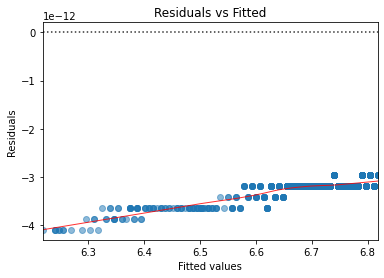

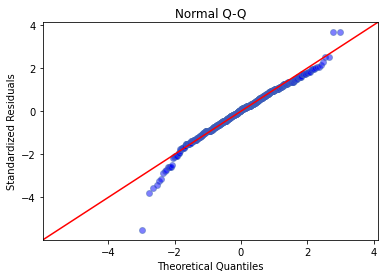

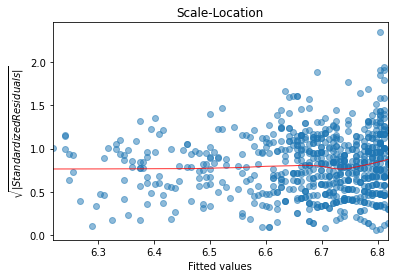

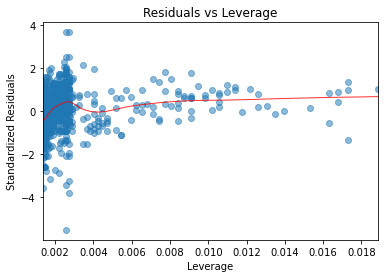

In [81]:
# Coder: Kelly

# Residuals vs Fitted Plot
residual_plot_m4 = plt.figure()
residual_plot_m4.axes[0] = sns.residplot(x = tscore_year.fittedvalues, y = data_year.columns[-1], data = data_year, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
residual_plot_m4.axes[0].set_title('Residuals vs Fitted')
residual_plot_m4.axes[0].set_xlabel('Fitted values')
residual_plot_m4.axes[0].set_ylabel('Residuals')

# Normal Q-Q
QQ = ProbPlot(tscore_year.get_influence().resid_studentized_internal)
qq_plot_m4 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
qq_plot_m4.axes[0].set_title('Normal Q-Q')
qq_plot_m4.axes[0].set_xlabel('Theoretical Quantiles')
qq_plot_m4.axes[0].set_ylabel('Standardized Residuals')

# Scale-Location
m4_norm_residuals = tscore_year.get_influence().resid_studentized_internal
m4_norm_residuals_abs_sqrt = np.sqrt(np.abs(m4_norm_residuals))
SL_plot_m4 = plt.figure()
plt.scatter(x = tscore_year.fittedvalues, y = m4_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(x = tscore_year.fittedvalues, y = m4_norm_residuals_abs_sqrt, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, data = I_vote);
SL_plot_m4.axes[0].set_title('Scale-Location')
SL_plot_m4.axes[0].set_xlabel('Fitted values')
SL_plot_m4.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

# Residuals vs Leverage Plot
# leverage, from statsmodels internals
m4_leverage = tscore_year.get_influence().hat_matrix_diag
# normalized residuals
m4_norm_residuals = tscore_year.get_influence().resid_studentized_internal
RL_plot_m4 = plt.figure();
plt.scatter(x = m4_leverage, y = m4_norm_residuals, alpha=0.5);
sns.regplot(x = m4_leverage, y = m4_norm_residuals, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
RL_plot_m4.axes[0].set_title('Residuals vs Leverage')
RL_plot_m4.axes[0].set_xlabel('Leverage')
RL_plot_m4.axes[0].set_ylabel('Standardized Residuals')

# Analysis: IMDB Score with TMDB Score

<AxesSubplot:xlabel='imdb_score', ylabel='tmdb_score'>

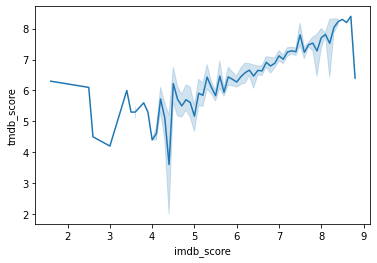

In [84]:
# imdb_score ~ tmdb_score
data_i_t = data.dropna(subset = ["imdb_score", "tmdb_score"])
sns.lineplot(x = "imdb_score", y = "tmdb_score", data = data_i_t)

In [85]:
# Coder: Valery
iscore_tscore = sm.ols(formula = "imdb_score ~ tmdb_score", data = data_i_t).fit()
print(iscore_tscore.params)
print(iscore_tscore.summary())

Intercept     1.177719
tmdb_score    0.788096
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     660.5
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          2.55e-104
Time:                        01:20:40   Log-Likelihood:                -811.09
No. Observations:                 734   AIC:                             1626.
Df Residuals:                     732   BIC:                             1635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Text(0, 0.5, 'Standardized Residuals')

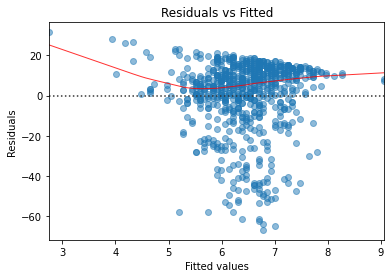

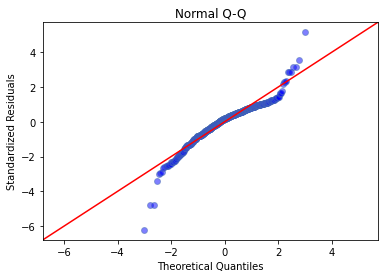

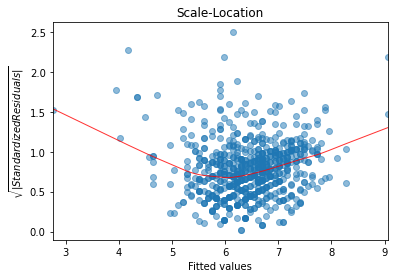

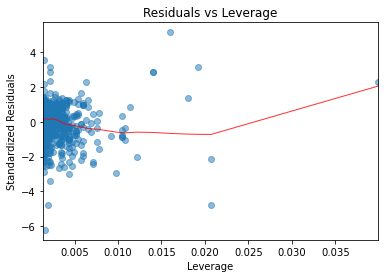

In [86]:
# Coder: Kelly

# Residuals vs Fitted Plot
residual_plot_m5 = plt.figure()
residual_plot_m5.axes[0] = sns.residplot(x = iscore_tscore.fittedvalues, y = data_i_t.columns[-1], data = data_i_t, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
residual_plot_m5.axes[0].set_title('Residuals vs Fitted')
residual_plot_m5.axes[0].set_xlabel('Fitted values')
residual_plot_m5.axes[0].set_ylabel('Residuals')

# Normal Q-Q
QQ = ProbPlot(iscore_tscore.get_influence().resid_studentized_internal)
qq_plot_m5 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
qq_plot_m5.axes[0].set_title('Normal Q-Q')
qq_plot_m5.axes[0].set_xlabel('Theoretical Quantiles')
qq_plot_m5.axes[0].set_ylabel('Standardized Residuals')

# Scale-Location
m5_norm_residuals = iscore_tscore.get_influence().resid_studentized_internal
m5_norm_residuals_abs_sqrt = np.sqrt(np.abs(m5_norm_residuals))
SL_plot_m5 = plt.figure()
plt.scatter(x = iscore_tscore.fittedvalues, y = m5_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(x = iscore_tscore.fittedvalues, y = m5_norm_residuals_abs_sqrt, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, data = I_vote);
SL_plot_m5.axes[0].set_title('Scale-Location')
SL_plot_m5.axes[0].set_xlabel('Fitted values')
SL_plot_m5.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

# Residuals vs Leverage Plot
# leverage, from statsmodels internals
m5_leverage = iscore_tscore.get_influence().hat_matrix_diag
# normalized residuals
m5_norm_residuals = iscore_tscore.get_influence().resid_studentized_internal
RL_plot_m5 = plt.figure();
plt.scatter(x = m5_leverage, y = m5_norm_residuals, alpha=0.5);
sns.regplot(x = m5_leverage, y = m5_norm_residuals, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
RL_plot_m5.axes[0].set_title('Residuals vs Leverage')
RL_plot_m5.axes[0].set_xlabel('Leverage')
RL_plot_m5.axes[0].set_ylabel('Standardized Residuals')

# Multi-variate Linear Regression Modelling

In [111]:
# Subsetting data by NaN values 
data_mlr = data.dropna(subset = ["imdb_score", "release_year","tmdb_score", "tmdb_popularity", "imdb_votes"])


# Creating linear regression models
mlr_i = sm.ols('imdb_score ~ release_year + tmdb_popularity + tmdb_score + imdb_votes', data= data_mlr).fit()
mlr_t = sm.ols('tmdb_score ~ release_year + tmdb_popularity + imdb_score + imdb_votes', data= data_mlr).fit()

# Printing the slope/equation appropriately.
print(mlr_i.params)
print(mlr_i.summary())

# Printing the slope/equation appropriately.
print(mlr_t.params)
print(mlr_t.summary())

Intercept          19.206186
release_year       -0.008867
tmdb_popularity    -0.000228
tmdb_score          0.729557
imdb_votes          0.000001
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     233.2
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          1.11e-128
Time:                        01:31:36   Log-Likelihood:                -738.49
No. Observations:                 731   AIC:                             1487.
Df Residuals:                     726   BIC:                             1510.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t  

## With the roughly 0.5 Adjusted R-squared we think we can do better by performing transformations– we will proceed using BoxCox. 

/Users/valery/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/valery/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 2.0492135572295544


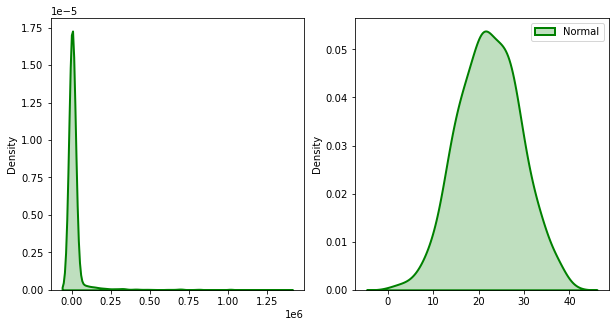

In [112]:
# Data we will use for boxcox
data_box = data.dropna(subset = ["imdb_score", "release_year","tmdb_score", "tmdb_popularity", "imdb_votes"])

# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(data_box["imdb_score"])
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(data_box, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

/Users/valery/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/valery/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/Users/valery/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/valery/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `

Lambda value used for Transformation: 46.89124147657019


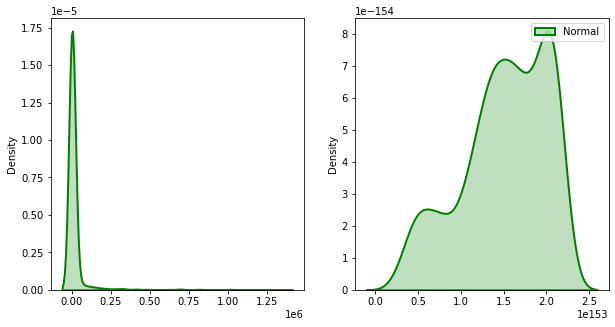

In [113]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(data_box["release_year"])
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(data_box, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

/Users/valery/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/valery/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 1.6260396231812633


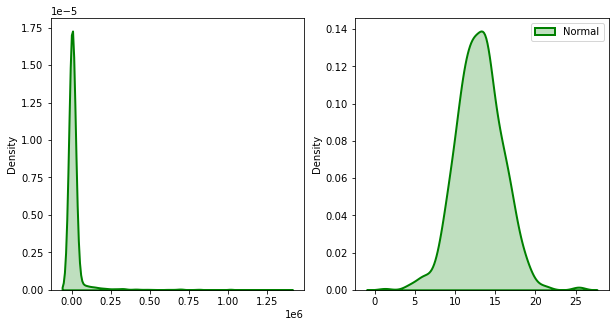

In [114]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(data_box["tmdb_score"])
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(data_box, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

/Users/valery/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/valery/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: -0.15328807599839792


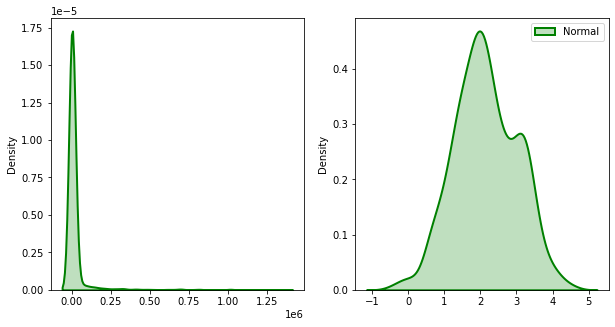

In [115]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(data_box["tmdb_popularity"])
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(data_box, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

/Users/valery/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/valery/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 0.05108502730247371


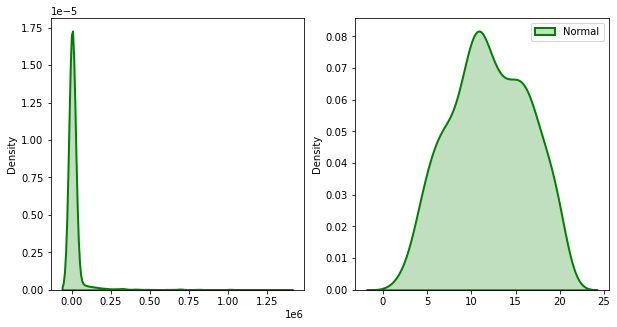

In [116]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(data_box["imdb_votes"])
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(data_box, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

## Applying the Appropriate Transformations Recommended by BoxPlot

In [117]:
# Creating linear regression models
mlr_i = sm.ols('I(imdb_score ** 2) ~ release_year + tmdb_popularity + I(tmdb_score ** 1.6) + imdb_votes', data= data_mlr).fit()
mlr_t = sm.ols('I(tmdb_score ** 1.6) ~ release_year + tmdb_popularity + I(imdb_score ** 2) + imdb_votes', data= data_mlr).fit()

# Printing the slope/equation appropriately.
print(mlr_i.params)
print(mlr_i.summary())

# Printing the slope/equation appropriately.
print(mlr_t.params)
print(mlr_t.summary())

Intercept               222.074460
release_year             -0.109747
tmdb_popularity          -0.002909
I(tmdb_score ** 1.6)      1.829460
imdb_votes                0.000017
dtype: float64
                            OLS Regression Results                            
Dep. Variable:     I(imdb_score ** 2)   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     263.5
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          8.77e-140
Time:                        01:31:44   Log-Likelihood:                -2551.8
No. Observations:                 731   AIC:                             5114.
Df Residuals:                     726   BIC:                             5137.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    

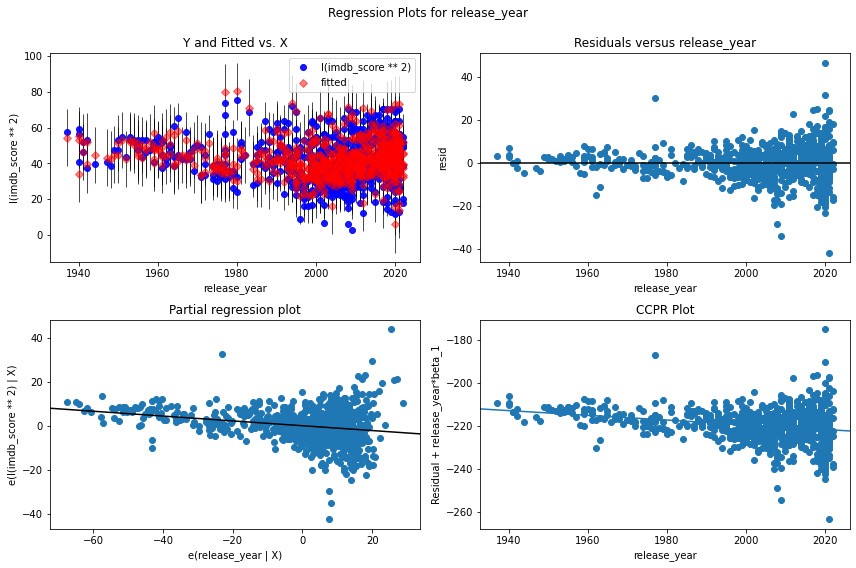

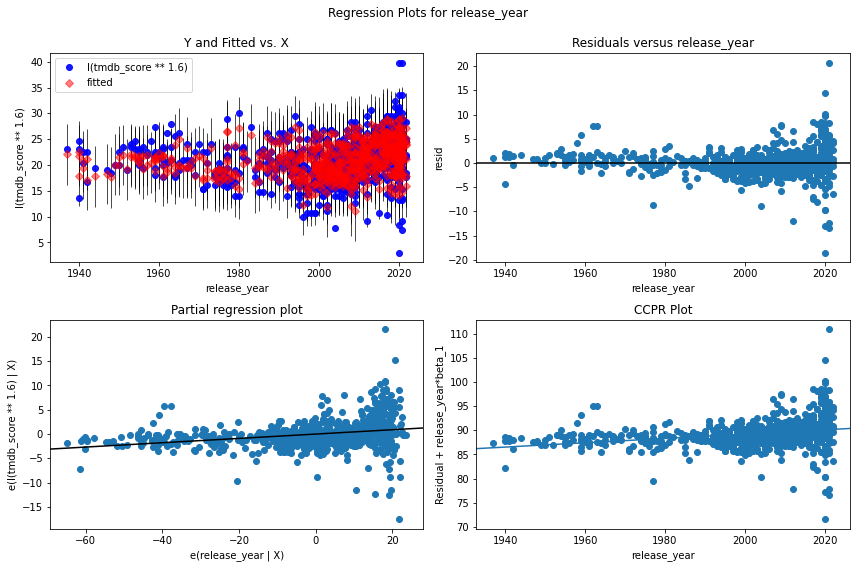

In [118]:
import statsmodels.api as sm

# Residual Plots for release_year
fig_i = plt.figure(figsize=(12,8))
fig_i = sm.graphics.plot_regress_exog(mlr_i, 'release_year', fig=fig_i)

fig_t = plt.figure(figsize=(12,8))
fig_t = sm.graphics.plot_regress_exog(mlr_t, 'release_year', fig=fig_t)


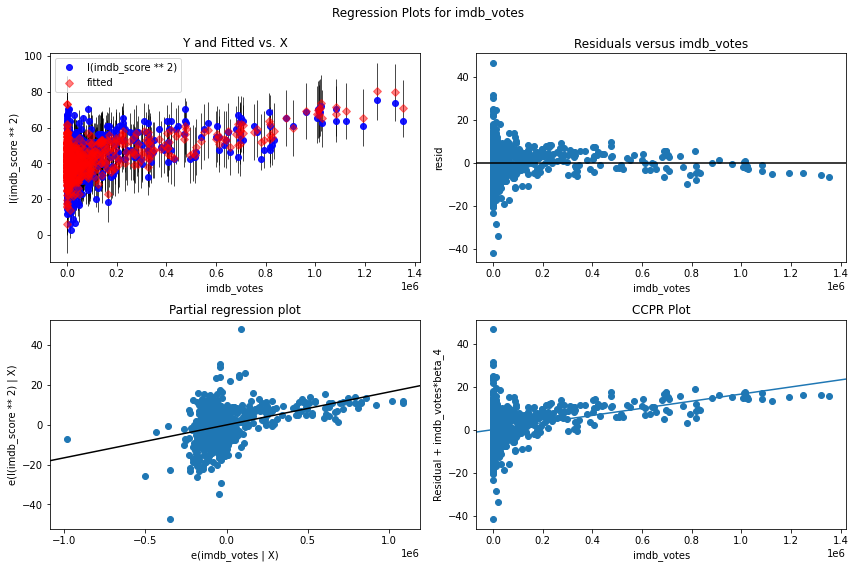

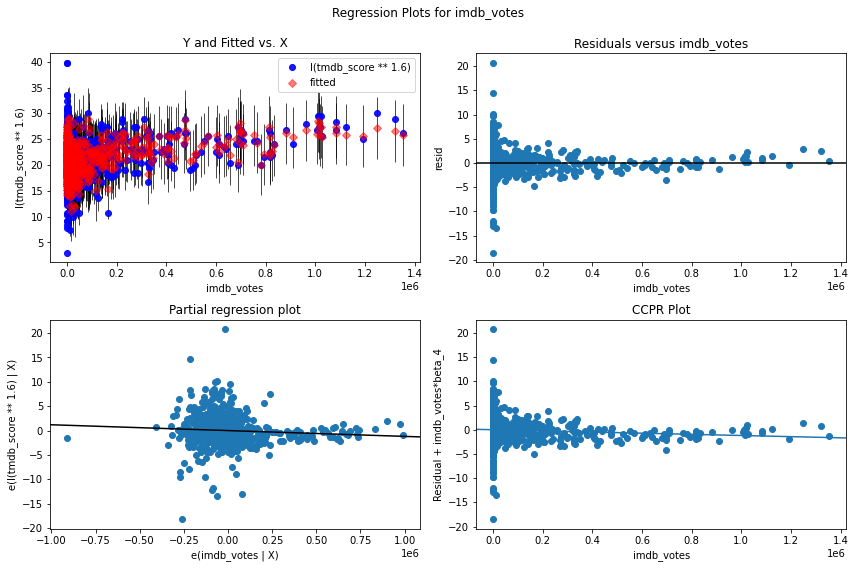

In [119]:
# Residual Plot for IMDB Votes
fig_i = plt.figure(figsize=(12,8))
fig_i = sm.graphics.plot_regress_exog(mlr_i, 'imdb_votes', fig=fig_i)

fig_t = plt.figure(figsize=(12,8))
fig_t = sm.graphics.plot_regress_exog(mlr_t, 'imdb_votes', fig=fig_t)

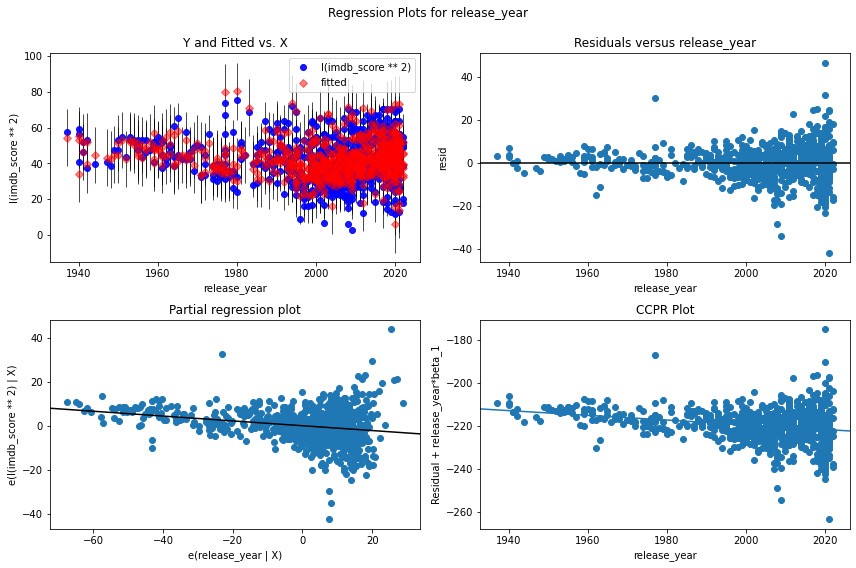

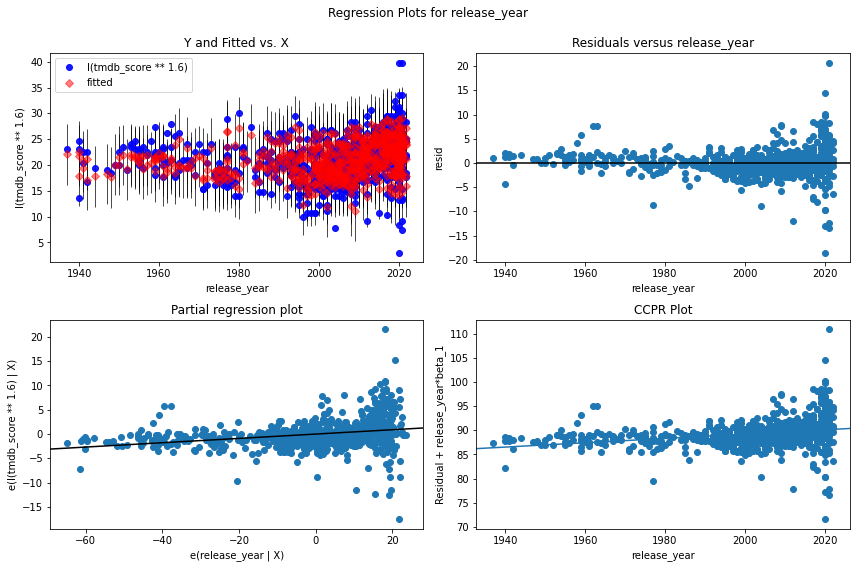

In [120]:
# Residual Plots for release_year
fig_i = plt.figure(figsize=(12,8))
fig_i = sm.graphics.plot_regress_exog(mlr_i, 'release_year', fig=fig_i)

fig_t = plt.figure(figsize=(12,8))
fig_t = sm.graphics.plot_regress_exog(mlr_t, 'release_year', fig=fig_t)

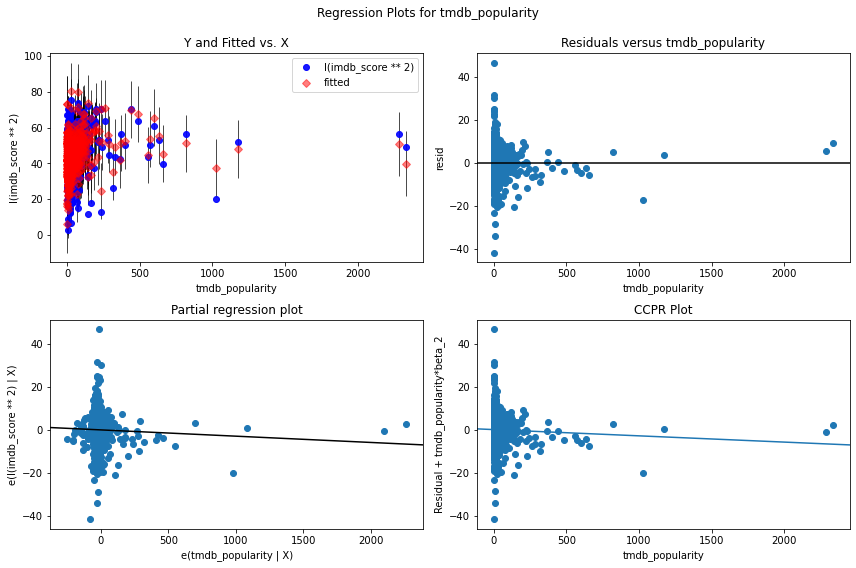

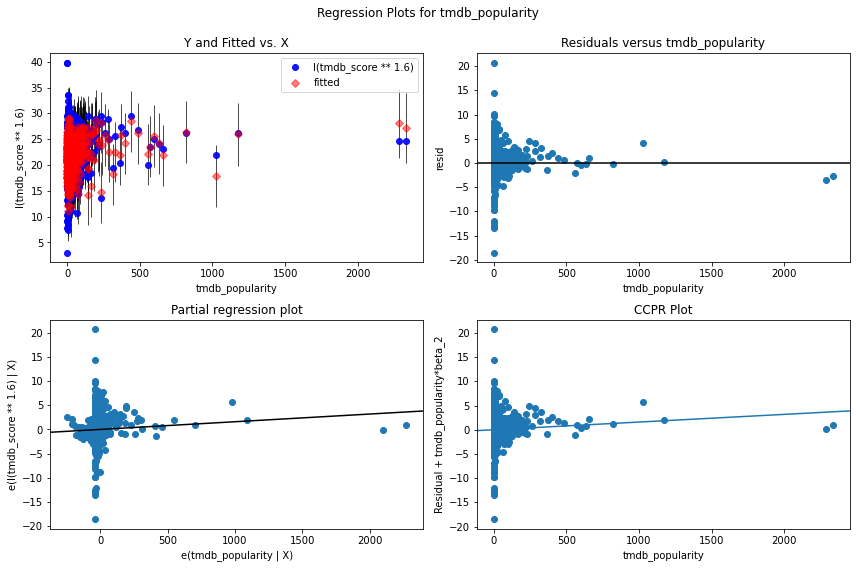

In [121]:
# Residual Plots for release_year
fig_i = plt.figure(figsize=(12,8))
fig_i = sm.graphics.plot_regress_exog(mlr_i, 'tmdb_popularity', fig=fig_i)

fig_t = plt.figure(figsize=(12,8))
fig_t = sm.graphics.plot_regress_exog(mlr_t, 'tmdb_popularity', fig=fig_t)

## Residual Plot for the IMDB Score Multivariate Model

Text(0, 0.5, 'Standardized Residuals')

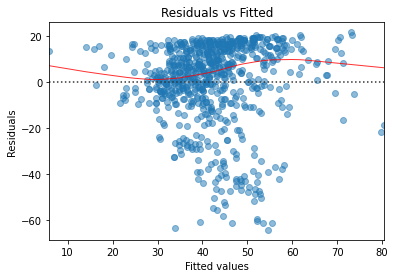

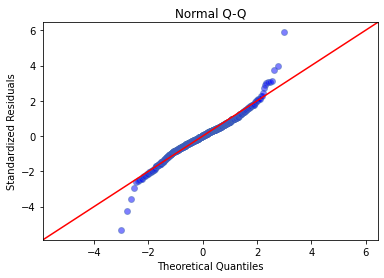

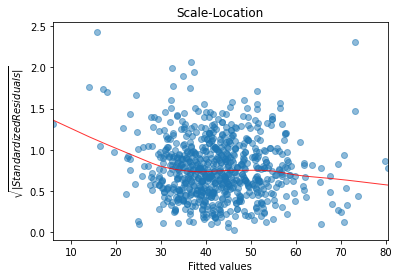

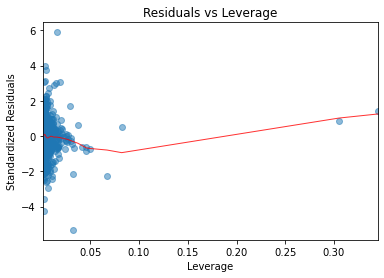

In [122]:
# Coder: Kelly

# Residuals vs Fitted Plot
residual_plot_mi = plt.figure()
residual_plot_mi.axes[0] = sns.residplot(x = mlr_i.fittedvalues, y = data_mlr.columns[-1], data = data_mlr, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
residual_plot_mi.axes[0].set_title('Residuals vs Fitted')
residual_plot_mi.axes[0].set_xlabel('Fitted values')
residual_plot_mi.axes[0].set_ylabel('Residuals')

# Normal Q-Q
QQ = ProbPlot(mlr_i.get_influence().resid_studentized_internal)
qq_plot_mi = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
qq_plot_mi.axes[0].set_title('Normal Q-Q')
qq_plot_mi.axes[0].set_xlabel('Theoretical Quantiles')
qq_plot_mi.axes[0].set_ylabel('Standardized Residuals')

# Scale-Location
mi_norm_residuals = mlr_i.get_influence().resid_studentized_internal
mi_norm_residuals_abs_sqrt = np.sqrt(np.abs(mi_norm_residuals))
SL_plot_mi = plt.figure()
plt.scatter(x = mlr_i.fittedvalues, y = mi_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(x = mlr_i.fittedvalues, y = mi_norm_residuals_abs_sqrt, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, data = I_vote);
SL_plot_mi.axes[0].set_title('Scale-Location')
SL_plot_mi.axes[0].set_xlabel('Fitted values')
SL_plot_mi.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

# Residuals vs Leverage Plot
# leverage, from statsmodels internals
mi_leverage = mlr_i.get_influence().hat_matrix_diag
# normalized residuals
mi_norm_residuals = mlr_i.get_influence().resid_studentized_internal
RL_plot_mi = plt.figure();
plt.scatter(x = mi_leverage, y = mi_norm_residuals, alpha=0.5);
sns.regplot(x = mi_leverage, y = mi_norm_residuals, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
RL_plot_mi.axes[0].set_title('Residuals vs Leverage')
RL_plot_mi.axes[0].set_xlabel('Leverage')
RL_plot_mi.axes[0].set_ylabel('Standardized Residuals')

## Residual Plot for the TMDB Score Multivariate Model

Text(0, 0.5, 'Standardized Residuals')

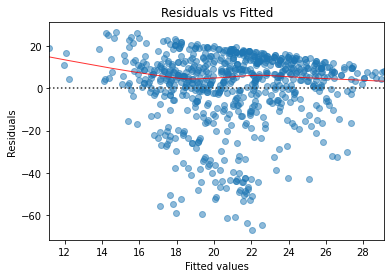

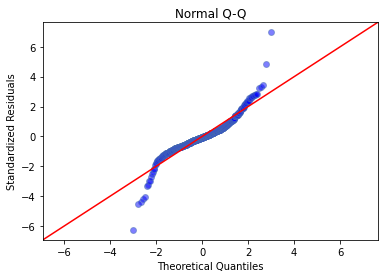

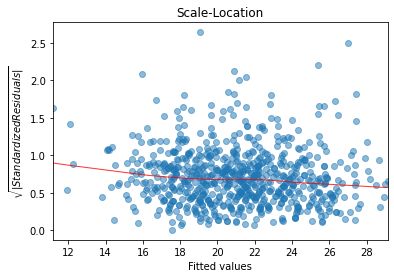

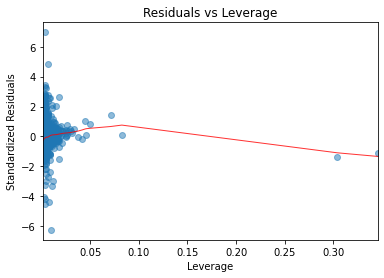

In [125]:
# Coder: Kelly

# Residuals vs Fitted Plot
residual_plot_mt = plt.figure()
residual_plot_mt.axes[0] = sns.residplot(x = mlr_t.fittedvalues, y = data_mlr.columns[-1], data = data_mlr, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
residual_plot_mt.axes[0].set_title('Residuals vs Fitted')
residual_plot_mt.axes[0].set_xlabel('Fitted values')
residual_plot_mt.axes[0].set_ylabel('Residuals')

# Normal Q-Q
QQ = ProbPlot(mlr_t.get_influence().resid_studentized_internal)
qq_plot_mt = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
qq_plot_mt.axes[0].set_title('Normal Q-Q')
qq_plot_mt.axes[0].set_xlabel('Theoretical Quantiles')
qq_plot_mt.axes[0].set_ylabel('Standardized Residuals')

# Scale-Location
mt_norm_residuals = mlr_t.get_influence().resid_studentized_internal
mt_norm_residuals_abs_sqrt = np.sqrt(np.abs(mt_norm_residuals))
SL_plot_mt = plt.figure()
plt.scatter(x = mlr_t.fittedvalues, y = mt_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(x = mlr_t.fittedvalues, y = mt_norm_residuals_abs_sqrt, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, data = data_mlr);
SL_plot_mt.axes[0].set_title('Scale-Location')
SL_plot_mt.axes[0].set_xlabel('Fitted values')
SL_plot_mt.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

# Residuals vs Leverage Plot
# leverage, from statsmodels internals
mt_leverage = mlr_t.get_influence().hat_matrix_diag
# normalized residuals
mt_norm_residuals = mlr_t.get_influence().resid_studentized_internal
RL_plot_mt = plt.figure();
plt.scatter(x = mt_leverage, y = mt_norm_residuals, alpha=0.5);
sns.regplot(x = mt_leverage, y = mt_norm_residuals, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
RL_plot_mt.axes[0].set_title('Residuals vs Leverage')
RL_plot_mt.axes[0].set_xlabel('Leverage')
RL_plot_mt.axes[0].set_ylabel('Standardized Residuals')